In [3]:
import numpy as np
import pandas as pd

In [12]:
customers = pd.read_csv("Customers.csv")
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
products = pd.read_csv("Products.csv")
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [6]:
transactions = pd.read_csv("Transactions.csv")
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [13]:
merged_df = transactions.merge(customers, on="CustomerID", how="left")

In [14]:
df = merged_df.merge(products, on="ProductID", how="left")

In [15]:
df.shape

(1000, 13)

In [16]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [17]:
df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

In [18]:
df.describe()

,Quantity,TotalValue,Price_x,Price_y
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,2.537000,689.995560,272.55407,272.55407
std,1.117981,493.144478,140.73639,140.73639
min,1.000000,16.080000,16.08000,16.08000
25%,2.000000,295.295000,147.95000,147.95000
50%,3.000000,588.880000,299.93000,299.93000
75%,4.000000,1011.660000,404.40000,404.40000
max,4.000000,1991.040000,497.76000,497.76000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

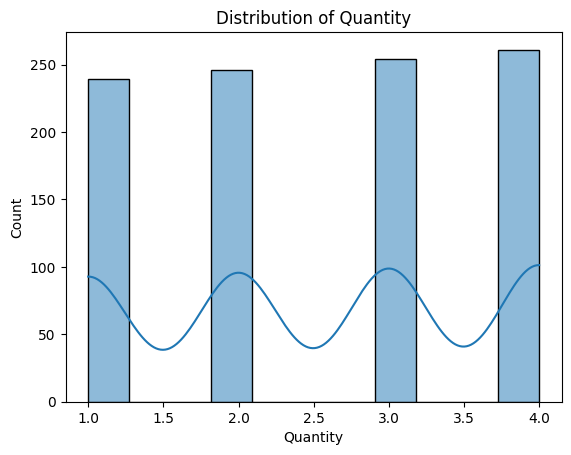

In [24]:
sns.histplot(df['Quantity'], kde=True)
plt.title('Distribution of Quantity')
plt.show()

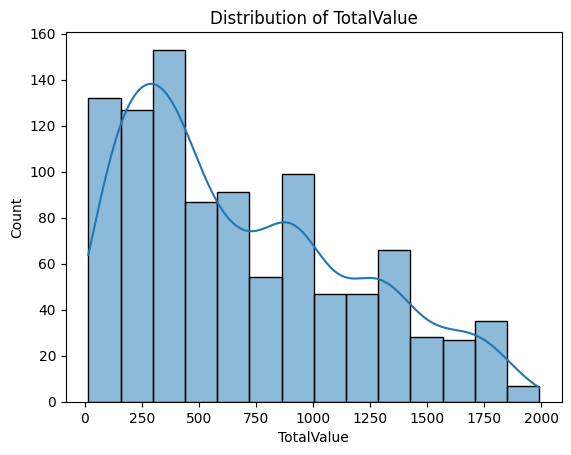

In [25]:
sns.histplot(df['TotalValue'], kde=True)
plt.title('Distribution of TotalValue')
plt.show()

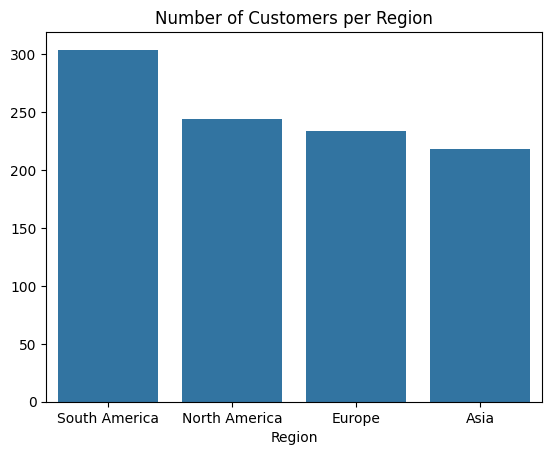

In [26]:
customer_region_count = df['Region'].value_counts()
sns.barplot(x=customer_region_count.index, y=customer_region_count.values)
plt.title('Number of Customers per Region')
plt.show()

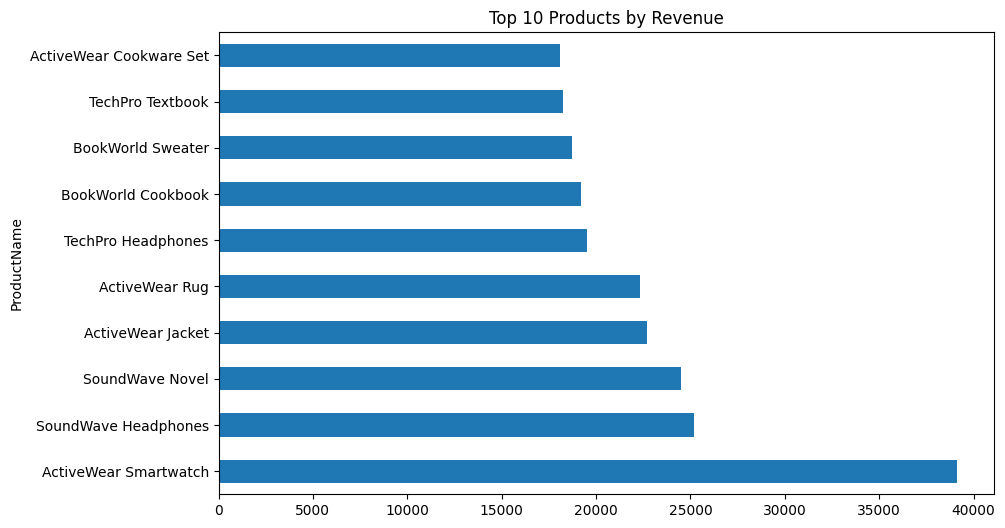

In [27]:
product_revenue = df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)
product_revenue.head(10).plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Products by Revenue')
plt.show()

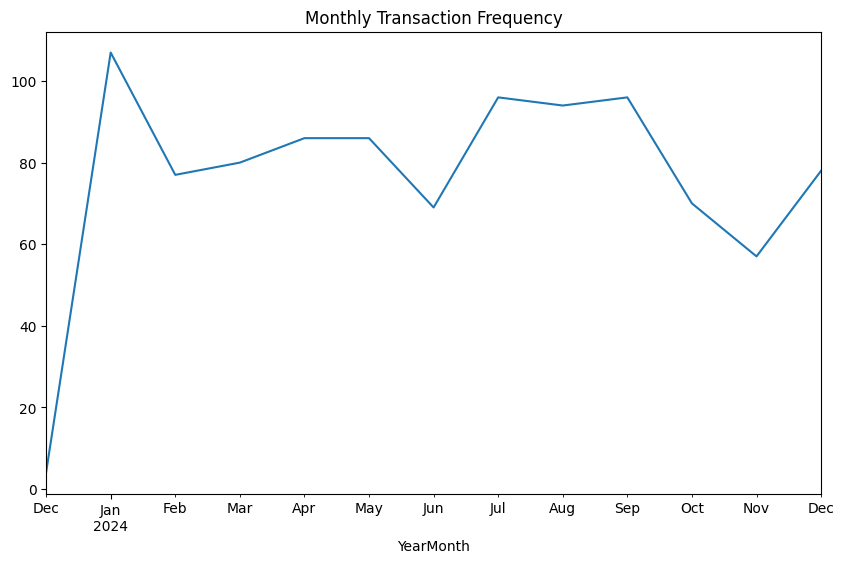

In [28]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['YearMonth'] = df['TransactionDate'].dt.to_period('M')
transaction_monthly = df.groupby('YearMonth').size()
transaction_monthly.plot(kind='line', figsize=(10, 6))
plt.title('Monthly Transaction Frequency')
plt.show()

In [29]:
avg_spending_per_customer = df.groupby('CustomerID')['TotalValue'].sum().mean()
print(f"Average Spending per Customer: {avg_spending_per_customer}")

Average Spending per Customer: 3467.314371859297


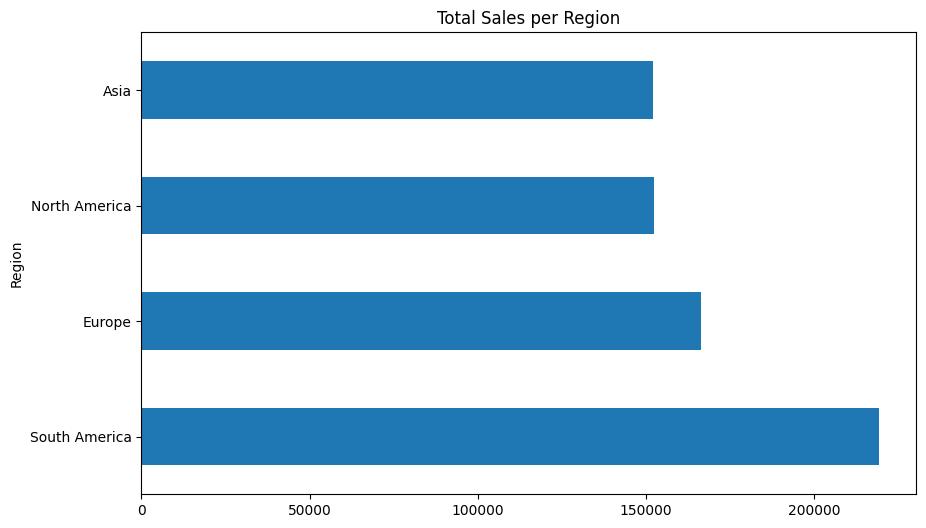

In [30]:
region_sales = df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
region_sales.plot(kind='barh', figsize=(10, 6))
plt.title('Total Sales per Region')
plt.show()

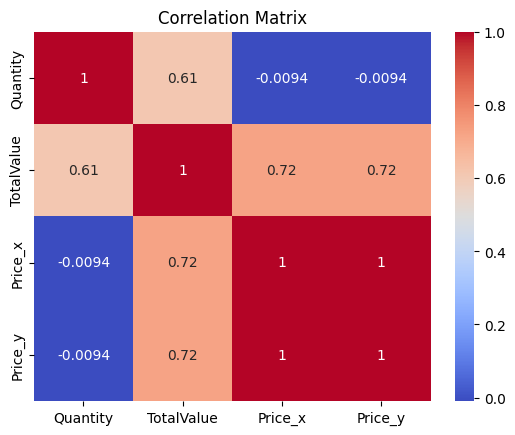

In [31]:
corr = df[['Quantity', 'TotalValue', 'Price_x', 'Price_y']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

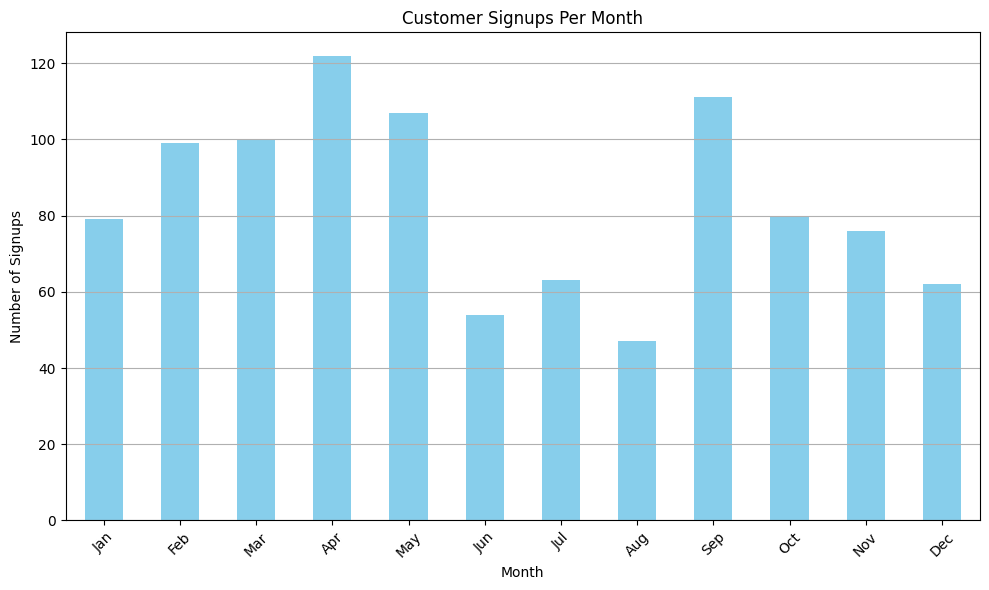

Number of signups in December: 62
Number of signups in March: 100
There is a higher number of signups in March. It might correspond with spring promotions or other events.


In [34]:

merged_df['SignupDate'] = pd.to_datetime(merged_df['SignupDate'], errors='coerce')


merged_df['SignupMonth'] = merged_df['SignupDate'].dt.month


signup_counts_per_month = merged_df['SignupMonth'].value_counts().sort_index()


plt.figure(figsize=(10,6))
signup_counts_per_month.plot(kind='bar', color='skyblue')
plt.title('Customer Signups Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


december_signups = merged_df[merged_df['SignupMonth'] == 12]
march_signups = merged_df[merged_df['SignupMonth'] == 3]


print(f"Number of signups in December: {len(december_signups)}")
print(f"Number of signups in March: {len(march_signups)}")

if len(december_signups) > len(march_signups):
    print("There is a higher number of signups in December. This may indicate a peak holiday season.")
else:
    print("There is a higher number of signups in March. It might correspond with spring promotions or other events.")
